## First why I need to detect Corners in Computer Vision Projects or General Image Processing

Image matching is an important task in computer vision. We need to know if two different images are for same scene or not. It is a challenging task. 

Challenges arise from different geometric and photometric transformation. 

- Geometric transformations include translation, rotation and scaling of images.
- Photometric transformations arises from change in brightness or exposure. 

For example, next two figures are images for same scene. How can we match them ?

![Imgur](https://imgur.com/aDzxPfx.png)

So, here comes the techniques of Patch Matching and the necessity of Good feature properties, which ideally needs to be Unique and distinctive. And corners in an image are one such great feature which Unique and distinctive

Patch matching is applied by selection of patch (square) in one image and match it with a patch in the other image.


### What is Corner Detection

![Imgur](https://imgur.com/4rNmOKF.png)

- Corner is the intersection of two edges. The intersection of the two sides represents a point where the directions of these two sides change. Therefore, the slope of the image has a high variation that can be used to detect it.

- Corners are regions where differences occur between intensity.

Corners are considered as a good feature as compared to edges and flat surfaces mainly because Corners are translation invariant and rotation invariant while distinguishable, unlike edges.

---

### What is Translation invariance in Computer Vision

Ans from [this source](https://stats.stackexchange.com/questions/208936/what-is-translation-invariance-in-computer-vision-and-convolutional-neural-netwo)

Translation invariance means that the system produces exactly the same response, regardless of how its input is shifted.

Invariance means that you can recognize an object as an object, even when its appearance varies in some way. This is generally a good thing, because it preserves the object's identity, category, (etc) across changes in the specifics of the visual input, like relative positions of the viewer/camera and the object.

The image below contains many views of the same statue. You (and well-trained neural networks) can recognize that the same object appears in every picture, even though the actual pixel values are quite different.

![Imgur](https://imgur.com/pPVHRrl.png)

---

## Harris Corner Detection

Harris Corner Detection uses a score function to evaluate whether a point is a corner or not. 

First it computes the horizontal and vertical derivatives (edges) of an image, then it performs cross correlation on these edge images to highlight corners, and then it performs non-maximum suppression to get rid of the edge features.

## Logic and workflow of Harris Corner Detection 

This method, of course, involves a lot of mathematical processes running behind the hood and based on the key foundational concept that - corners are regions in the image with large variation in intensity in all the directions.

The basic idea of how it works is described in the following three steps.

- A fixed-size window is made to slide throughout the image and find the window that produces huge intensity variation when moved in both X and Y directions.

- For each such window found, a score R is computed.

- The necessary corners are then selected by applying a threshold to this score. Generally, when R is small, the region is considered a flat region. When R is less than 0, the region is considered an edge, and R is large, the region is considered a corner.

---

### More Detailed Derivation of Harris corner detection algorithm

So as I talked about, The Key idea is to locate interest points where the surrounding neighbourhood shows edges in more than one direction. So Mathematically the basic idea of algorithm is to find the difference in intensity for a displacement of (u,v) in all directions which is expressed as below:

![Imgur](https://imgur.com/AW2PadB.png)

![Imgur](https://imgur.com/Wmn5h6S.png)

The window function is either a rectangular window or a Gaussian window which gives weights to pixels underneath.

We have to maximize this function E(u,v) for corner detection. That means we have to maximize the second term. Applying Taylor Expansion to the above equation and using some mathematical steps we get the final equation as:

![Imgur](https://imgur.com/Xy3cgMs.png)

Here, Ix and Iy are image derivatives in x and y directions respectively. (These can be easily found using cv.Sobel()).

Then comes the main part. After this, they created a score, basically an equation, which determines if a window can contain a corner or not.

![Imgur](https://imgur.com/f04nXBo.png)

---

### Harris Corner detector has 4 main steps:

1. Edge detection (spatial derivative calculation) - The first step is to convert the grayscale image into an image of edges. There are many techniques to do this, but the cv2 uses a filter called Sobel's kernel, which gets cross-correlated with the original image. The **ksize** parameter determines the size of the Sobel kernel (3x3, 5x5, etc..). As the **size increases**, more pixels are part of each convolution process and the **edges will get more blurry**.

2. Structure tensor setup - Basically we construct a matrix M which represents the direction of the gradients (edges) at every point of the image. This matrix can then be used to determine which of the edge pixels are corners:

[![enter image description here][1]][1]

3. Harris response calculation - In this step, we calculate the "corner score" R of each edge pixel. **The idea is that a pixel is defined as a corner only if it has big gradients in 2 perpendicular directions, which means the M matrix has 2 big eigenvalues (1 big eigenvalue will simply be an edge).** 
Here we can see **Harris detector's free parameter - k**. It is an empirically determined constant in the range [0.04,0.06]:

[![enter image description here][2]][2]

### The **k parameter** lets you influence the precision and recall. 

So with a **bigger k, you will get less false corners** but you will also miss more real corners (i.e. you will achieve high precision).

And with a **smaller k you will get a lot more corners**. SO you will miss less true corners, but will also get a lot of false ones (i.e. you will have high recall).

4. Non-maximum suppression - The maxima of corner pixels in every local area is found and the rest are suppressed.

  [1]: https://i.stack.imgur.com/R4PYF.png
  [2]: https://i.stack.imgur.com/FvPKK.png

  ---

### What does cv2.cornerHarris return?

The **`cv2.cornerHarris`** detector returns the corners that were found. As usual this method does not return a list of corners that were found. Instead, it returns an 2d-array - same size as the input - with probabilities. Each position inside this array holds the confidence in this pixel being a corner (to be precise it is not the single pixel, that is predicted to be a corner. It is the neighbourhood that is centered at this coordinates)


In [65]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import os
from os import listdir
import warnings
warnings.filterwarnings("ignore")

1. Harris Corner Detector

Harris Corner detector is used to extract corners from grayscale images.
The Harris detector works by first calculating the image gradient, then calculating the covariance of the gradient, which is an approximation of the local Hessian.


* img - Input image, it should be grayscale and float32 type.
* blockSize - It is the size of neighbourhood considered for corner detection
* ksize - Aperture parameter of Sobel derivative used.
* k - Harris detector free parameter in the equation.

The [Official Doc is here](https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html?highlight=cornerharris#cornerharris)

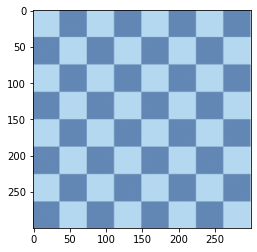

In [66]:
my_image = cv2.imread('./ChessBoard.png')
plt.imshow(my_image)

In [67]:
img_grayscaled = cv2.cvtColor(my_image,cv2.COLOR_BGR2GRAY)

img_grayscaled = np.float32(img_grayscaled)

dst = cv2.cornerHarris(img_grayscaled,2,5,0.1)

""" cv2.cornerHarris detector returns 2d-array - same size as the input - with probabilities. Each position inside this array holds the confidence in this pixel being a corner (to be precise it is not the single pixel, that is predicted to be a corner. It is the neighbourhood that is centered at this coordinates) """

print('dst ', dst)

dst  [[-1.1783600e-03 -1.1783600e-03 -4.3790437e-02 ... -2.2123256e+05
  -5.3614300e+06 -3.4051598e+06]
 [-1.1783600e-03 -1.1783600e-03 -4.3790437e-02 ... -2.2123256e+05
  -5.3614300e+06 -3.4051598e+06]
 [ 1.2210845e-03  1.2210845e-03 -1.6393624e-01 ... -2.2217838e+05
  -5.3810110e+06 -3.4166175e+06]
 ...
 [-1.9816970e-02 -1.9816970e-02 -5.8254246e-03 ... -2.9691357e+02
  -6.2278213e+03 -3.8021868e+03]
 [ 7.5721741e-04  7.5721741e-04 -3.0136108e-03 ... -3.8318848e+02
  -7.1172422e+03 -4.1715752e+03]
 [ 4.0527340e-03  4.0527340e-03  2.4948120e-02 ... -4.6848944e+02
  -8.1265967e+03 -4.6973608e+03]]


### How to count the number of features detected as those dots identified as corners

Again on this point - What is returned from the Harris corner detector function is a response map that gives you the "probability" that a particular pixel is a corner point. 

Therefore, if we thresholded this response map it would give us the locations of where corners are located in the image. This thresholded map is thus a binary mask, which is being used to index into the input image that helps you delineate where these locations are. Because it's a binary mask, you can just calculate the sum of this mask to tell you how many corner points there are

In [68]:
number_of_corners = np.sum(dst > 0.01 * dst.max())
print(number_of_corners)


575


Now importantly, above calculation of counting number_of_corners, needs to be done before the dilation step.

#### What does dilation do

Dilation is a technique where we expand the image. It adds number of pixels to the boundaries of objects in an image. 

Because in the next step when I invoke `cv2.dilate()` method to mark the corners in the returned image. It adds pixels to the corners of objects in an image to increases the object area and this is used to accentuate features.

Because, the dilation step is primarily used for visualisation so you can see the corners better. Therefore for all these reasons, if you want to know the pure number of corners in an image, run the above code of `np.sum()` right after you run the Harris corner detector and before applying the dilation step.

In [69]:
# Dilate corner image to enhance corner points
dst = cv2.dilate(dst,None, iterations=2)

# Threshold for an optimal value, it may vary depending on the image.
my_image[dst>0.01*dst.max()]=[0,0,255]


Above line finds any location in the Harris corner response map that exceeds the detection threshold and sets those locations to [0, 0, 255] 

**`dst>0.01*dst.max()`** - What this code is doing =>  cv2.cornerHarris returns a value for confidence in it's own prediction. And with dst>0.01*dst.max() the code filters corners that are only "low-confidence-corners". 

So any corner that is detected will be marked as a corner if the confidence is higher than 1% of the highest confidence.

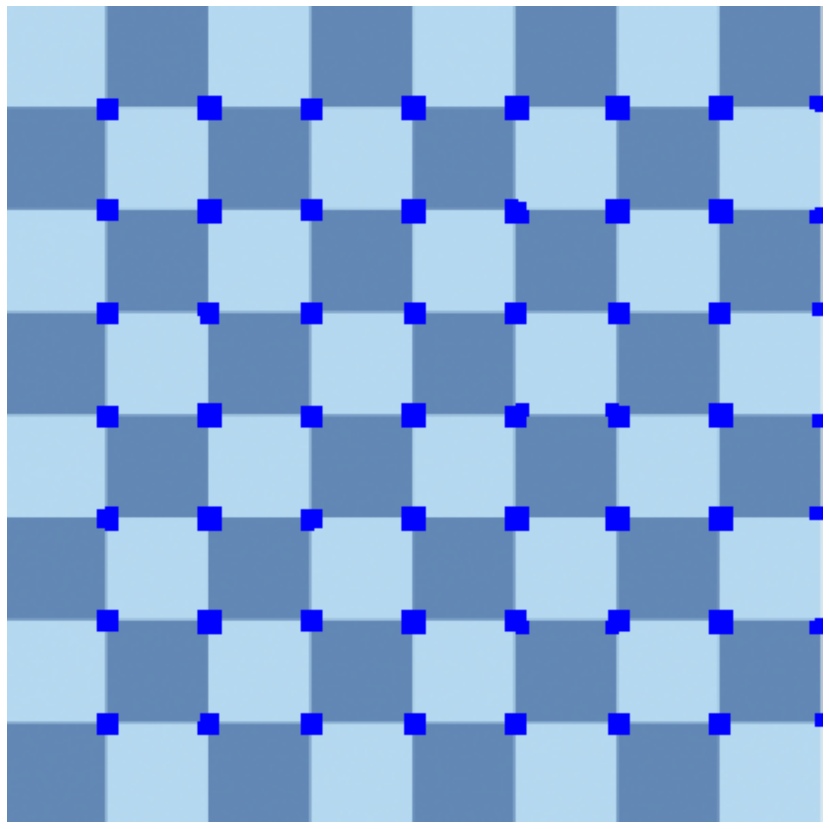

In [70]:

plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(my_image); plt.show()

if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()
#If any related memory usage is not de-allocated, calling destroyAllWindows will take care of the de-allocation.

---

## Bonus - If you are interested in the Math for the Score Function

![Imgur](https://imgur.com/l9VfoPU.png)

![Imgur](https://imgur.com/YRVGYWD.png)

![Imgur](https://imgur.com/EM7LNWZ.png)

![Imgur](https://imgur.com/3e618zf.png)